In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1: Data Loading and Basic Inspection

In [84]:
# Load the dataset and display the first 10 rows.
df=pd.read_csv('DRREDDY.csv')
df.head(10)
# df.describe()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,DRREDDY.NS,DRREDDY.NS,DRREDDY.NS,DRREDDY.NS,DRREDDY.NS,DRREDDY.NS
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,1996-01-01 00:00:00+00:00,5.830164432525635,11.149999618530273,11.300000190734863,11.149999618530273,11.279999732971191,14000
3,1996-01-02 00:00:00+00:00,5.780490875244141,11.055000305175781,11.149999618530273,11.052499771118164,11.149999618530273,42000
4,1996-01-03 00:00:00+00:00,5.783105373382568,11.0600004196167,11.125,11.050000190734863,11.055000305175781,56000
5,1996-01-04 00:00:00+00:00,5.575258255004883,10.662500381469727,10.75,10.607500076293945,11.0600004196167,18000
6,1996-01-05 00:00:00+00:00,5.443230628967285,10.40999984741211,10.797499656677246,10.399999618530273,10.662500381469727,60000
7,1996-01-08 00:00:00+00:00,5.372640609741211,10.274999618530273,10.699999809265137,10.25,10.40999984741211,62000
8,1996-01-09 00:00:00+00:00,5.22361946105957,9.989999771118164,10.300000190734863,9.850000381469727,10.274999618530273,90000
9,1996-01-10 00:00:00+00:00,5.305972099304199,10.147500038146973,10.202500343322754,10.0024995803833,9.989999771118164,34000


In [85]:
# Identify the column names of the dataset.
df.columns

Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [86]:
# Check the number of rows and columns in the dataset.
print('Number of rows-',df.shape[0])
print('Number of columns-',df.shape[1])


Number of rows- 7252
Number of columns- 7


In [87]:
type(df)

pandas.core.frame.DataFrame

In [88]:
# Display the data types of all columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      7252 non-null   object
 1   Adj Close  7251 non-null   object
 2   Close      7251 non-null   object
 3   High       7251 non-null   object
 4   Low        7251 non-null   object
 5   Open       7251 non-null   object
 6   Volume     7251 non-null   object
dtypes: object(7)
memory usage: 396.7+ KB


In [89]:
# Check for missing values in the dataset.
df.isna()

,Price,Adj Close,Close,High,Low,Open,Volume
0,False,False,False,False,False,False,False
1,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
7247,False,False,False,False,False,False,False
7248,False,False,False,False,False,False,False
7249,False,False,False,False,False,False,False
7250,False,False,False,False,False,False,False


In [90]:
# Count the total number of missing values for each column.
print('The number of missing values columnwise-')
df.isna().sum()

The number of missing values columnwise-


Price        0
Adj Close    1
Close        1
High         1
Low          1
Open         1
Volume       1
dtype: int64

In [91]:
# Display summary statistics of all numeric columns.
df.describe()

,Price,Adj Close,Close,High,Low,Open,Volume
count,7252,7251,7251,7251,7251,7251,7251
unique,7252,6971,6841,5783,5979,5220,6915
top,2024-11-13 00:00:00+00:00,7.402742385864258,14.157500267028809,75.0,74.0,130.0,0
freq,1,6,6,9,11,15,115


In [92]:
# Rename columns to make them more readable (e.g., replace spaces with underscores).
df=df.rename(columns={'Adj Close':'Adj_Close','Price':'Date_time'})
df.head()

,Date_time,Adj_Close,Close,High,Low,Open,Volume
0,Ticker,DRREDDY.NS,DRREDDY.NS,DRREDDY.NS,DRREDDY.NS,DRREDDY.NS,DRREDDY.NS
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,1996-01-01 00:00:00+00:00,5.830164432525635,11.149999618530273,11.300000190734863,11.149999618530273,11.279999732971191,14000
3,1996-01-02 00:00:00+00:00,5.780490875244141,11.055000305175781,11.149999618530273,11.052499771118164,11.149999618530273,42000
4,1996-01-03 00:00:00+00:00,5.783105373382568,11.0600004196167,11.125,11.050000190734863,11.055000305175781,56000


In [93]:
# Check if there are any duplicate rows.
df.duplicated().sum() #There are no duplicate values

#check

np.int64(0)

In [94]:
# Drop rows where all elements are NaN.
df=df.dropna()
df

,Date_time,Adj_Close,Close,High,Low,Open,Volume
0,Ticker,DRREDDY.NS,DRREDDY.NS,DRREDDY.NS,DRREDDY.NS,DRREDDY.NS,DRREDDY.NS
2,1996-01-01 00:00:00+00:00,5.830164432525635,11.149999618530273,11.300000190734863,11.149999618530273,11.279999732971191,14000
3,1996-01-02 00:00:00+00:00,5.780490875244141,11.055000305175781,11.149999618530273,11.052499771118164,11.149999618530273,42000
4,1996-01-03 00:00:00+00:00,5.783105373382568,11.0600004196167,11.125,11.050000190734863,11.055000305175781,56000
5,1996-01-04 00:00:00+00:00,5.575258255004883,10.662500381469727,10.75,10.607500076293945,11.0600004196167,18000
...,...,...,...,...,...,...,...
7247,2024-11-07 00:00:00+00:00,1287.3499755859375,1287.3499755859375,1309.0,1280.550048828125,1304.949951171875,1479152
7248,2024-11-08 00:00:00+00:00,1283.6500244140625,1283.6500244140625,1293.0,1259.1500244140625,1292.800048828125,1328199
7249,2024-11-11 00:00:00+00:00,1287.9000244140625,1287.9000244140625,1295.25,1262.1500244140625,1284.0,1175591
7250,2024-11-12 00:00:00+00:00,1263.9000244140625,1263.9000244140625,1288.4000244140625,1258.300048828125,1287.8499755859375,1110785


In [95]:
df.isna().sum()

Date_time    0
Adj_Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [96]:
df

,Date_time,Adj_Close,Close,High,Low,Open,Volume
0,Ticker,DRREDDY.NS,DRREDDY.NS,DRREDDY.NS,DRREDDY.NS,DRREDDY.NS,DRREDDY.NS
2,1996-01-01 00:00:00+00:00,5.830164432525635,11.149999618530273,11.300000190734863,11.149999618530273,11.279999732971191,14000
3,1996-01-02 00:00:00+00:00,5.780490875244141,11.055000305175781,11.149999618530273,11.052499771118164,11.149999618530273,42000
4,1996-01-03 00:00:00+00:00,5.783105373382568,11.0600004196167,11.125,11.050000190734863,11.055000305175781,56000
5,1996-01-04 00:00:00+00:00,5.575258255004883,10.662500381469727,10.75,10.607500076293945,11.0600004196167,18000
...,...,...,...,...,...,...,...
7247,2024-11-07 00:00:00+00:00,1287.3499755859375,1287.3499755859375,1309.0,1280.550048828125,1304.949951171875,1479152
7248,2024-11-08 00:00:00+00:00,1283.6500244140625,1283.6500244140625,1293.0,1259.1500244140625,1292.800048828125,1328199
7249,2024-11-11 00:00:00+00:00,1287.9000244140625,1287.9000244140625,1295.25,1262.1500244140625,1284.0,1175591
7250,2024-11-12 00:00:00+00:00,1263.9000244140625,1263.9000244140625,1288.4000244140625,1258.300048828125,1287.8499755859375,1110785


# Part 2: Data Cleaning

In [97]:
# Remove rows that are not part of the main data (e.g., header rows duplicated in the data).
df.head()
# df.drop(axis=0)
# df.drop(np.where(df.iloc[0])[0])

# df.drop(df.iloc[0,np.where(df.iloc[0])[0]],axis=0)

# x=np.where(df.iloc[0,:])[0]
# x
df=df.drop([0],axis=0)
# check-
#How to remove values that are of a different type in the dataframe column.

In [98]:
df

,Date_time,Adj_Close,Close,High,Low,Open,Volume
2,1996-01-01 00:00:00+00:00,5.830164432525635,11.149999618530273,11.300000190734863,11.149999618530273,11.279999732971191,14000
3,1996-01-02 00:00:00+00:00,5.780490875244141,11.055000305175781,11.149999618530273,11.052499771118164,11.149999618530273,42000
4,1996-01-03 00:00:00+00:00,5.783105373382568,11.0600004196167,11.125,11.050000190734863,11.055000305175781,56000
5,1996-01-04 00:00:00+00:00,5.575258255004883,10.662500381469727,10.75,10.607500076293945,11.0600004196167,18000
6,1996-01-05 00:00:00+00:00,5.443230628967285,10.40999984741211,10.797499656677246,10.399999618530273,10.662500381469727,60000
...,...,...,...,...,...,...,...
7247,2024-11-07 00:00:00+00:00,1287.3499755859375,1287.3499755859375,1309.0,1280.550048828125,1304.949951171875,1479152
7248,2024-11-08 00:00:00+00:00,1283.6500244140625,1283.6500244140625,1293.0,1259.1500244140625,1292.800048828125,1328199
7249,2024-11-11 00:00:00+00:00,1287.9000244140625,1287.9000244140625,1295.25,1262.1500244140625,1284.0,1175591
7250,2024-11-12 00:00:00+00:00,1263.9000244140625,1263.9000244140625,1288.4000244140625,1258.300048828125,1287.8499755859375,1110785


In [99]:
for i in df.columns[1:]:
    df[i]=pd.to_numeric(df[i],errors='coerce')

In [100]:
df.describe()

,Adj_Close,Close,High,Low,Open,Volume
count,7250.000000,7250.000000,7250.000000,7250.000000,7250.000000,7.250000e+03
mean,289.924253,365.298541,369.919387,360.938994,365.651541,2.471908e+06
std,325.938237,347.133565,350.761502,343.762787,347.588682,2.982946e+06
min,4.062814,7.770000,7.777500,7.602500,7.652500,0.000000e+00
25%,43.754714,81.118748,82.825003,79.947500,81.124998,1.071179e+06
50%,145.488228,240.430000,245.729996,236.334999,241.014999,1.731055e+06
75%,443.257164,578.720001,586.409988,572.034988,578.749985,2.939289e+06
max,1412.489990,1412.489990,1421.489990,1393.069946,1412.469971,1.099354e+08


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7250 entries, 2 to 7251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date_time  7250 non-null   object 
 1   Adj_Close  7250 non-null   float64
 2   Close      7250 non-null   float64
 3   High       7250 non-null   float64
 4   Low        7250 non-null   float64
 5   Open       7250 non-null   float64
 6   Volume     7250 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 453.1+ KB


In [102]:
# Convert the Date column into a proper datetime object.
df['Date']=df['Date_time'].apply(lambda a:a.split()[0])
df['Time']=df['Date_time'].apply(lambda a:a.split()[1])

df=df.drop('Date_time',axis=1)
df

,Adj_Close,Close,High,Low,Open,Volume,Date,Time
2,5.830164,11.150000,11.300000,11.150000,11.280000,14000,1996-01-01,00:00:00+00:00
3,5.780491,11.055000,11.150000,11.052500,11.150000,42000,1996-01-02,00:00:00+00:00
4,5.783105,11.060000,11.125000,11.050000,11.055000,56000,1996-01-03,00:00:00+00:00
5,5.575258,10.662500,10.750000,10.607500,11.060000,18000,1996-01-04,00:00:00+00:00
6,5.443231,10.410000,10.797500,10.400000,10.662500,60000,1996-01-05,00:00:00+00:00
...,...,...,...,...,...,...,...,...
7247,1287.349976,1287.349976,1309.000000,1280.550049,1304.949951,1479152,2024-11-07,00:00:00+00:00
7248,1283.650024,1283.650024,1293.000000,1259.150024,1292.800049,1328199,2024-11-08,00:00:00+00:00
7249,1287.900024,1287.900024,1295.250000,1262.150024,1284.000000,1175591,2024-11-11,00:00:00+00:00
7250,1263.900024,1263.900024,1288.400024,1258.300049,1287.849976,1110785,2024-11-12,00:00:00+00:00


In [103]:
print(df['Time'].unique())  #Since time has only one unique value so it is dropped.
df=df.drop('Time',axis=1)
df

['00:00:00+00:00']


,Adj_Close,Close,High,Low,Open,Volume,Date
2,5.830164,11.150000,11.300000,11.150000,11.280000,14000,1996-01-01
3,5.780491,11.055000,11.150000,11.052500,11.150000,42000,1996-01-02
4,5.783105,11.060000,11.125000,11.050000,11.055000,56000,1996-01-03
5,5.575258,10.662500,10.750000,10.607500,11.060000,18000,1996-01-04
6,5.443231,10.410000,10.797500,10.400000,10.662500,60000,1996-01-05
...,...,...,...,...,...,...,...
7247,1287.349976,1287.349976,1309.000000,1280.550049,1304.949951,1479152,2024-11-07
7248,1283.650024,1283.650024,1293.000000,1259.150024,1292.800049,1328199,2024-11-08
7249,1287.900024,1287.900024,1295.250000,1262.150024,1284.000000,1175591,2024-11-11
7250,1263.900024,1263.900024,1288.400024,1258.300049,1287.849976,1110785,2024-11-12


In [104]:
df['Date']=pd.to_datetime(df['Date']) #convert date to datetime format

In [105]:
# Extract the year, month, and day from the Date column as new columns.
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

In [106]:
df

,Adj_Close,Close,High,Low,Open,Volume,Date,Year,Month,Day
2,5.830164,11.150000,11.300000,11.150000,11.280000,14000,1996-01-01,1996,1,1
3,5.780491,11.055000,11.150000,11.052500,11.150000,42000,1996-01-02,1996,1,2
4,5.783105,11.060000,11.125000,11.050000,11.055000,56000,1996-01-03,1996,1,3
5,5.575258,10.662500,10.750000,10.607500,11.060000,18000,1996-01-04,1996,1,4
6,5.443231,10.410000,10.797500,10.400000,10.662500,60000,1996-01-05,1996,1,5
...,...,...,...,...,...,...,...,...,...,...
7247,1287.349976,1287.349976,1309.000000,1280.550049,1304.949951,1479152,2024-11-07,2024,11,7
7248,1283.650024,1283.650024,1293.000000,1259.150024,1292.800049,1328199,2024-11-08,2024,11,8
7249,1287.900024,1287.900024,1295.250000,1262.150024,1284.000000,1175591,2024-11-11,2024,11,11
7250,1263.900024,1263.900024,1288.400024,1258.300049,1287.849976,1110785,2024-11-12,2024,11,12


In [107]:
# Replace missing numeric values with the column mean.

#No missing values


# an example-
# df = pd.DataFrame({
#     "Column1": [1, 2, np.nan, 4],
#     "Column2": [np.nan, 2, 3, 4],
#     "Column3": [1, np.nan, np.nan, 4]
# })
# df.head()
# df['Column2'].fillna(df['Column2'].mean())

# similarly-
df['Close'].fillna(df['Close'].mean())

2         11.150000
3         11.055000
4         11.060000
5         10.662500
6         10.410000
           ...     
7247    1287.349976
7248    1283.650024
7249    1287.900024
7250    1263.900024
7251    1245.000000
Name: Close, Length: 7250, dtype: float64

In [108]:
# Replace missing categorical values with the most frequent category in that column.


#check

In [109]:
# Remove columns that have more than 50% missing values.
# Identify and handle outliers in the numeric columns.
# Normalize the numeric columns for better comparability.
# Create a new column that categorizes the Volume into "High", "Medium", and "Low".

In [110]:
# Filter out rows with Volume values below a certain threshold (e.g., 10,000).
df_filt=df[df['Volume']>10000]
df_filt
df=df_filt.copy()
df.count()

Adj_Close    7130
Close        7130
High         7130
Low          7130
Open         7130
Volume       7130
Date         7130
Year         7130
Month        7130
Day          7130
dtype: int64

# Part 3: Data Exploration

In [111]:
# Find the total number of unique dates in the dataset.
print('Total number of unique dates in dataframe-',df['Date'].dt.strftime('%d-%m-%y').nunique())

Total number of unique dates in dataframe- 7130


In [112]:
# Identify the date with the highest Volume.
print('Date with the highest volume is -',df[df['Volume']==max(df['Volume'])]['Date'].dt.strftime('%d-%m-%Y')[6224])

Date with the highest volume is - 18-09-2020


In [113]:
# Find the average Adj Close value for each year.
df.groupby('Year').mean()['Adj_Close']

Year
1996       6.601749
1997       6.654196
1998      11.230940
1999      25.155176
2000      35.556319
2001      41.319312
2002      47.981935
2003      55.261666
2004      47.812074
2005      42.939895
2006      76.290853
2007      74.904849
2008      65.428725
2009      88.344663
2010     173.569229
2011     201.034092
2012     221.845568
2013     288.127862
2014     391.370098
2015     515.834669
2016     456.980515
2017     386.240370
2018     367.861538
2019     451.836629
2020     710.438579
2021     871.766646
2022     787.539625
2023     965.374521
2024    1246.050583
Name: Adj_Close, dtype: float64

In [114]:
# Determine the median High value across all rows.
df['High'].median()

np.float64(269.05999755859375)

In [115]:
# Find the correlation between Adj Close, High, and Low.

In [116]:
# List the top 5 dates with the highest Close values.
df.sort_values('Close',ascending=False)['Date'][0:5]

7192   2024-08-21
7199   2024-08-30
7185   2024-08-09
7197   2024-08-28
7193   2024-08-22
Name: Date, dtype: datetime64[ns]

In [117]:
# Count how many times the Volume exceeded 1 million.
len(df[df['Volume']>1000000])

5619

In [118]:
# Find the maximum and minimum values of Open for each year.
df[['Year','Open']].groupby('Year').max().head()

,Open
Year,
1996,16.350000
1997,17.105000
1998,28.400000
1999,79.849998
2000,89.894997


In [119]:
df[['Year','Open']].groupby('Year').min().head()

,Open
Year,
1996,7.6525
1997,8.1000
1998,16.0250
1999,24.4100
2000,51.2500


In [120]:
# Calculate the daily price difference (High - Low) and create a new column for it.
df['Price_Diff']=df['High']-df['Low']
df

,Adj_Close,Close,High,Low,Open,Volume,Date,Year,Month,Day,Price_Diff
2,5.830164,11.150000,11.300000,11.150000,11.280000,14000,1996-01-01,1996,1,1,0.150001
3,5.780491,11.055000,11.150000,11.052500,11.150000,42000,1996-01-02,1996,1,2,0.097500
4,5.783105,11.060000,11.125000,11.050000,11.055000,56000,1996-01-03,1996,1,3,0.075000
5,5.575258,10.662500,10.750000,10.607500,11.060000,18000,1996-01-04,1996,1,4,0.142500
6,5.443231,10.410000,10.797500,10.400000,10.662500,60000,1996-01-05,1996,1,5,0.397500
...,...,...,...,...,...,...,...,...,...,...,...
7247,1287.349976,1287.349976,1309.000000,1280.550049,1304.949951,1479152,2024-11-07,2024,11,7,28.449951
7248,1283.650024,1283.650024,1293.000000,1259.150024,1292.800049,1328199,2024-11-08,2024,11,8,33.849976
7249,1287.900024,1287.900024,1295.250000,1262.150024,1284.000000,1175591,2024-11-11,2024,11,11,33.099976
7250,1263.900024,1263.900024,1288.400024,1258.300049,1287.849976,1110785,2024-11-12,2024,11,12,30.099976


In [121]:
# Identify the date with the largest daily price difference.
df.iloc[np.where(df['Price_Diff']==np.max(df['Price_Diff']))[0]].Date

5834   2019-02-15
Name: Date, dtype: datetime64[ns]

# Part 4: Grouping and Aggregation

In [122]:
# Group the data by year and calculate the total Volume for each year.
df.groupby('Year')['Volume'].sum()

Year
1996      45396000
1997     321530000
1998    1113258000
1999     583818560
2000     468749440
2001     849274790
2002     407653770
2003     494226430
2004     569702000
2005     468610960
2006     777618550
2007     601355180
2008     483979045
2009     550217095
2010     540584325
2011     400525595
2012     403733525
2013     413526330
2014     463130195
2015     553597185
2016     455504375
2017     683470960
2018    1016343360
2019     868992440
2020    1866700285
2021     980845320
2022     588155815
2023     507623665
2024     443174309
Name: Volume, dtype: int64

In [123]:
# Find the average Close value for each month across all years.
df.head()
df.pivot_table(df,['Year','Month'],aggfunc='mean')['Volume'].head(20)

Year  Month
1996  1        5.695238e+04
      2        9.800000e+04
      3        7.200000e+04
      4        1.071429e+05
      5        1.033913e+05
      6        1.994000e+05
      7        2.150435e+05
      8        2.293333e+05
      9        4.174286e+05
      10       2.147000e+05
      11       1.211000e+05
      12       3.935556e+05
1997  1        8.989091e+05
      2        8.040000e+05
      3        1.553556e+06
      4        9.202222e+05
      5        1.328476e+06
      6        1.055429e+06
      7        1.064000e+06
      8        1.450700e+06
Name: Volume, dtype: float64

In [124]:
# Determine the year with the highest average Adj Close.
df[df['Adj_Close']==max(df['Adj_Close'])]['Year']

7192    2024
Name: Year, dtype: int32

In [126]:
# Group the data by Date and calculate the sum of Volume for each.

#check

In [150]:
# Identify months where the average Close exceeded 10.
new_df=df.pivot_table(df,['Year','Month'],aggfunc='mean')
new_df[new_df['Close']>10].head(20).reset_index().loc[:,['Year','Month','Close']]

,Year,Month,Close
0,1996,1,10.487381
1,1996,2,12.641500
2,1996,3,13.035694
3,1996,4,13.630357
4,1996,5,14.364674
5,1996,6,15.267625
6,1996,7,15.197283
7,1996,8,13.325476
8,1996,9,12.972500
9,1996,10,10.687000


# Part 5: Filtering and Sorting

In [ ]:
# Filter rows where the High is greater than 10.
df.iloc[np.where(df['High']>10)[0]].head(50)

In [165]:
# Sort the dataset by Date in ascending order.
df.sort_values(by='Date').head(20)

,Adj_Close,Close,High,Low,Open,Volume,Date,Year,Month,Day,Price_Diff
2,5.830164,11.1500,11.3000,11.1500,11.2800,14000,1996-01-01,1996,1,1,0.150001
3,5.780491,11.0550,11.1500,11.0525,11.1500,42000,1996-01-02,1996,1,2,0.097500
4,5.783105,11.0600,11.1250,11.0500,11.0550,56000,1996-01-03,1996,1,3,0.075000
5,5.575258,10.6625,10.7500,10.6075,11.0600,18000,1996-01-04,1996,1,4,0.142500
6,5.443231,10.4100,10.7975,10.4000,10.6625,60000,1996-01-05,1996,1,5,0.397500
7,5.372641,10.2750,10.7000,10.2500,10.4100,62000,1996-01-08,1996,1,8,0.450000
8,5.223619,9.9900,10.3000,9.8500,10.2750,90000,1996-01-09,1996,1,9,0.450000
9,5.305972,10.1475,10.2025,10.0025,9.9900,34000,1996-01-10,1996,1,10,0.200001
10,5.424929,10.3750,10.4000,10.2500,10.1475,28000,1996-01-11,1996,1,11,0.150000
11,5.438003,10.4000,10.4500,10.4000,10.3750,24000,1996-01-12,1996,1,12,0.050000


In [167]:
# Find all rows where Volume is between 500,000 and 1,000,000.
df[(df['Volume']>500000) & (df['Volume']<1000000)].head(60)

,Adj_Close,Close,High,Low,Open,Volume,Date,Year,Month,Day,Price_Diff
138,8.627599,16.5000,16.6975,16.1500,16.1500,564000,1996-07-09,1996,7,9,0.547501
177,7.164829,13.7025,13.7500,13.2750,13.3475,664000,1996-09-02,1996,9,2,0.475000
179,7.095547,13.5700,13.7500,13.2500,13.3500,526000,1996-09-04,1996,9,4,0.500000
183,6.996197,13.3800,13.4750,13.2500,13.4000,548000,1996-09-10,1996,9,10,0.225000
184,6.878549,13.1550,13.4750,13.0500,13.4000,686000,1996-09-11,1996,9,11,0.425000
185,6.874627,13.1475,13.2875,13.0000,13.0750,534000,1996-09-12,1996,9,12,0.287500
187,6.972668,13.3350,13.4200,13.0500,13.1000,592000,1996-09-16,1996,9,16,0.370000
188,7.021035,13.4275,13.5900,13.1000,13.4900,972000,1996-09-17,1996,9,17,0.490000
248,4.095494,7.8325,8.0225,7.6025,7.8550,578000,1996-12-10,1996,12,10,0.420000
255,4.317720,8.2575,8.3425,7.9750,8.1825,628000,1996-12-19,1996,12,19,0.367500


In [168]:
# Retrieve rows where the Close price is higher than the Open price.
df[df['Close']>df['Open']]

,Adj_Close,Close,High,Low,Open,Volume,Date,Year,Month,Day,Price_Diff
4,5.783105,11.060000,11.125000,11.050000,11.055000,56000,1996-01-03,1996,1,3,0.075000
9,5.305972,10.147500,10.202500,10.002500,9.990000,34000,1996-01-10,1996,1,10,0.200001
10,5.424929,10.375000,10.400000,10.250000,10.147500,28000,1996-01-11,1996,1,11,0.150000
11,5.438003,10.400000,10.450000,10.400000,10.375000,24000,1996-01-12,1996,1,12,0.050000
14,5.385713,10.300000,10.300000,10.190000,10.297500,64000,1996-01-17,1996,1,17,0.110001
...,...,...,...,...,...,...,...,...,...,...,...
7242,1274.199951,1274.199951,1283.650024,1248.000000,1258.599976,1902206,2024-10-31,2024,10,31,35.650024
7244,1268.300049,1268.300049,1276.900024,1250.550049,1259.599976,1771490,2024-11-04,2024,11,4,26.349976
7245,1272.199951,1272.199951,1279.000000,1241.250000,1265.099976,1603920,2024-11-05,2024,11,5,37.750000
7246,1302.099976,1302.099976,1321.900024,1251.599976,1274.000000,3908554,2024-11-06,2024,11,6,70.300049


In [172]:
# Filter out rows where Low is less than 5.
df[df['Low']>=5]

,Adj_Close,Close,High,Low,Open,Volume,Date,Year,Month,Day,Price_Diff
2,5.830164,11.150000,11.300000,11.150000,11.280000,14000,1996-01-01,1996,1,1,0.150001
3,5.780491,11.055000,11.150000,11.052500,11.150000,42000,1996-01-02,1996,1,2,0.097500
4,5.783105,11.060000,11.125000,11.050000,11.055000,56000,1996-01-03,1996,1,3,0.075000
5,5.575258,10.662500,10.750000,10.607500,11.060000,18000,1996-01-04,1996,1,4,0.142500
6,5.443231,10.410000,10.797500,10.400000,10.662500,60000,1996-01-05,1996,1,5,0.397500
...,...,...,...,...,...,...,...,...,...,...,...
7247,1287.349976,1287.349976,1309.000000,1280.550049,1304.949951,1479152,2024-11-07,2024,11,7,28.449951
7248,1283.650024,1283.650024,1293.000000,1259.150024,1292.800049,1328199,2024-11-08,2024,11,8,33.849976
7249,1287.900024,1287.900024,1295.250000,1262.150024,1284.000000,1175591,2024-11-11,2024,11,11,33.099976
7250,1263.900024,1263.900024,1288.400024,1258.300049,1287.849976,1110785,2024-11-12,2024,11,12,30.099976


# Part 6: Visualization Practice

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7130 entries, 2 to 7251
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Adj_Close   7130 non-null   float64       
 1   Close       7130 non-null   float64       
 2   High        7130 non-null   float64       
 3   Low         7130 non-null   float64       
 4   Open        7130 non-null   float64       
 5   Volume      7130 non-null   int64         
 6   Date        7130 non-null   datetime64[ns]
 7   Year        7130 non-null   int32         
 8   Month       7130 non-null   int32         
 9   Day         7130 non-null   int32         
 10  Price_Diff  7130 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int32(3), int64(1)
memory usage: 584.9 KB


<Axes: xlabel='Date', ylabel='Adj_Close'>

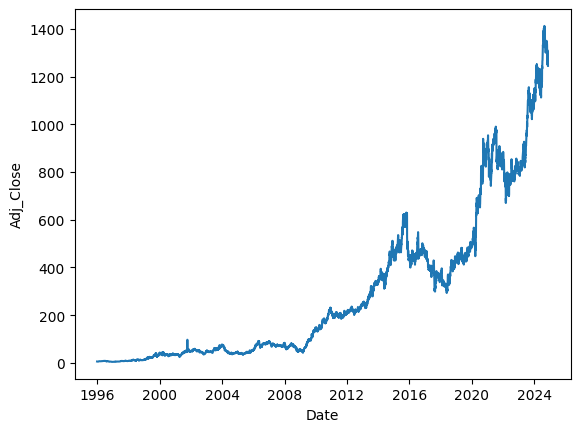

In [177]:
# Plot the trend of Adj Close values over time.
sns.lineplot(data=df,x='Date',y='Adj_Close')

(0.0, 109935390.0)

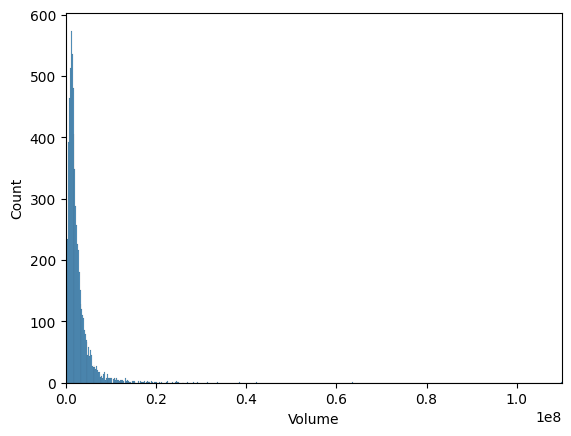

In [196]:
# Visualize the distribution of Volume using a histogram.
sns.histplot(data=df,x='Volume')
plt.xlim(0,109935390) #till max value

(0.0, 20993539.0)

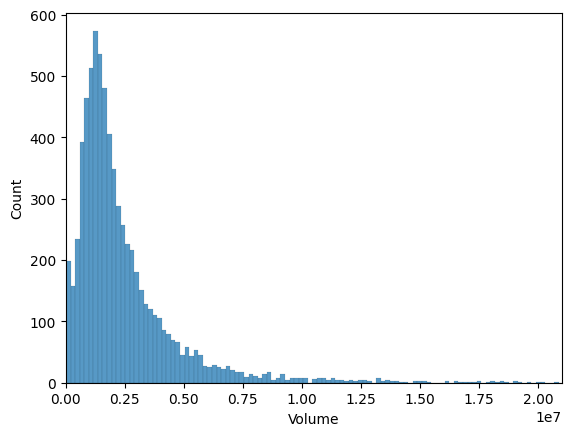

In [197]:
sns.histplot(data=df,x='Volume')
plt.xlim(0,20993539)   #approx graph

<Axes: xlabel='Low', ylabel='High'>

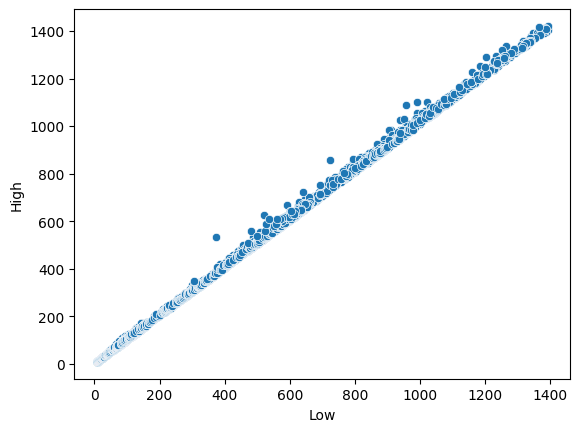

In [200]:
# Create a scatter plot of High vs. Low.
sns.scatterplot(data=df,x='Low',y='High')

<Axes: xlabel='Date', ylabel='Price_Diff'>

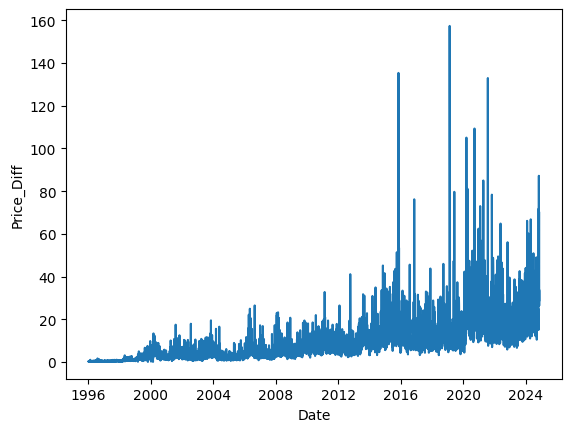

In [212]:
# Plot the daily price difference (High - Low) over time.
sns.lineplot(data=df,x='Date',y='Price_Diff')

C:\Users\AAYUSH\AppData\Local\Temp\ipykernel_11328\1838280412.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=vol,x='Year',y='Volume',ci=None)


<Axes: xlabel='Year', ylabel='Volume'>

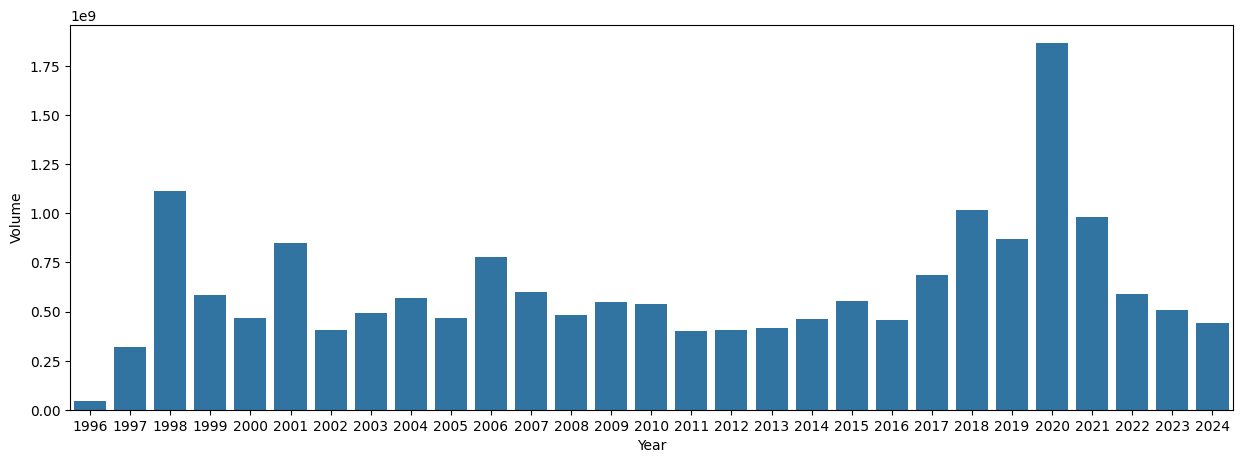

In [227]:
# Visualize the total Volume traded each year using a bar chart.
grp=df.groupby('Year')
Vol=grp['Volume'].sum()
vol=Vol.reset_index()
vol

plt.figure(figsize=(15,5))
sns.barplot(data=vol,x='Year',y='Volume',ci=None)

In [ ]:
# Part 7: Advanced Analysis
# Calculate a rolling average for the Adj Close column over a 7-day window.
# Create a new column that shows the percentage change in Adj Close compared to the previous day.
# Find and plot the top 10 days with the highest percentage change in Adj Close.
# Perform a time series decomposition to analyze trends, seasonality, and residuals in the Adj Close data.
# Write a summary report of your findings from the dataset.

# Part 8: Advanced Filtering and Indexing

In [232]:
# Filter rows where the High value is greater than the Close value for the day.
fltr=df[df['High']<=df['Close']]
fltr  #just 71 rows! out of 7130

,Adj_Close,Close,High,Low,Open,Volume,Date,Year,Month,Day,Price_Diff
14,5.385713,10.300000,10.300000,10.1900,10.2975,64000,1996-01-17,1996,1,17,0.110001
20,5.542578,10.600000,10.600000,10.3000,10.4675,88000,1996-01-25,1996,1,25,0.300000
27,6.013174,11.500000,11.500000,11.2500,11.2000,50000,1996-02-05,1996,2,5,0.250000
30,6.222327,11.900000,11.900000,11.5500,11.5500,56000,1996-02-08,1996,2,8,0.349999
53,6.847176,13.095000,13.095000,12.9550,13.0025,150000,1996-03-12,1996,3,12,0.140000
...,...,...,...,...,...,...,...,...,...,...,...
1081,42.059540,80.437500,80.437500,80.4375,80.4375,1038080,2000-02-18,2000,2,18,0.000000
1084,41.591572,79.542503,79.542503,77.7500,78.7500,979540,2000-02-23,2000,2,23,1.792503
1097,36.888203,70.547501,70.547501,67.5000,67.5000,304100,2000-03-13,2000,3,13,3.047501
1098,39.839893,76.192497,76.192497,72.2500,74.0000,1528600,2000-03-14,2000,3,14,3.942497


In [233]:
# Retrieve rows where the difference between High and Low is more than 10% of the Open price.
df[df['Price_Diff']>df['Open']*.1]

,Adj_Close,Close,High,Low,Open,Volume,Date,Year,Month,Day,Price_Diff
154,7.098160,13.575000,13.737500,12.107500,12.500000,136000,1996-07-31,1996,7,31,1.630000
608,11.755756,22.482500,24.934999,21.850000,24.400000,6956000,1998-04-28,1998,4,28,3.084999
620,11.958374,22.870001,23.000000,20.750000,20.750000,3694000,1998-05-14,1998,5,14,2.250000
646,9.170092,17.537500,19.450001,17.500000,18.500000,530000,1998-06-19,1998,6,19,1.950001
647,9.092965,17.389999,17.947500,15.787500,16.250000,1008000,1998-06-22,1998,6,22,2.160000
...,...,...,...,...,...,...,...,...,...,...,...
6100,493.901306,579.450012,589.799988,528.200012,528.200012,7772855,2020-03-20,2020,3,20,61.599976
6101,471.935944,553.679993,609.400024,536.049988,536.049988,4816170,2020-03-23,2020,3,23,73.350037
6110,610.836914,716.640015,723.119995,642.000000,650.000000,11837790,2020-04-07,2020,4,7,81.119995
6224,939.251465,1066.670044,1099.390015,990.049988,1000.000000,109935390,2020-09-18,2020,9,18,109.340027


In [236]:
# Select the top 5 rows with the lowest Adj Close values.
df.sort_values(by='Adj_Close').head(5)

,Adj_Close,Close,High,Low,Open,Volume,Date,Year,Month,Day,Price_Diff
245,4.062814,7.7700,7.8375,7.6525,7.6525,472000,1996-12-05,1996,12,5,0.1850
260,4.066735,7.7775,8.2425,7.7575,8.1250,890000,1996-12-26,1996,12,26,0.4850
248,4.095494,7.8325,8.0225,7.6025,7.8550,578000,1996-12-10,1996,12,10,0.4200
263,4.112488,7.8650,7.9500,7.7500,7.8000,454000,1996-12-31,1996,12,31,0.2000
247,4.173928,7.9825,8.1975,7.9250,8.1375,408000,1996-12-09,1996,12,9,0.2725


In [241]:
# Reset the index of the dataset and drop the old index.
df=df.reset_index(drop=True)
df

,Adj_Close,Close,High,Low,Open,Volume,Date,Year,Month,Day,Price_Diff
0,5.830164,11.150000,11.300000,11.150000,11.280000,14000,1996-01-01,1996,1,1,0.150001
1,5.780491,11.055000,11.150000,11.052500,11.150000,42000,1996-01-02,1996,1,2,0.097500
2,5.783105,11.060000,11.125000,11.050000,11.055000,56000,1996-01-03,1996,1,3,0.075000
3,5.575258,10.662500,10.750000,10.607500,11.060000,18000,1996-01-04,1996,1,4,0.142500
4,5.443231,10.410000,10.797500,10.400000,10.662500,60000,1996-01-05,1996,1,5,0.397500
...,...,...,...,...,...,...,...,...,...,...,...
7125,1287.349976,1287.349976,1309.000000,1280.550049,1304.949951,1479152,2024-11-07,2024,11,7,28.449951
7126,1283.650024,1283.650024,1293.000000,1259.150024,1292.800049,1328199,2024-11-08,2024,11,8,33.849976
7127,1287.900024,1287.900024,1295.250000,1262.150024,1284.000000,1175591,2024-11-11,2024,11,11,33.099976
7128,1263.900024,1263.900024,1288.400024,1258.300049,1287.849976,1110785,2024-11-12,2024,11,12,30.099976


In [244]:
# Filter rows where the Date is between two specific dates (e.g., '2000-01-01' and '2010-01-01').
df[(df['Date']>pd.to_datetime('2000-01-01')) & (df['Date']<pd.to_datetime('2010-01-01'))]

,Adj_Close,Close,High,Low,Open,Volume,Date,Year,Month,Day,Price_Diff
983,39.432049,75.412498,75.412498,75.250000,75.250000,265600,2000-01-03,2000,1,3,0.162498
984,42.587654,81.447502,81.447502,75.500000,79.500000,1142840,2000-01-04,2000,1,4,5.947502
985,40.995472,78.402496,82.500000,74.949997,77.449997,2393940,2000-01-05,2000,1,5,7.550003
986,43.439953,83.077499,84.675003,78.550003,79.949997,2439320,2000-01-06,2000,1,6,6.125000
987,39.977154,76.455002,84.250000,76.432503,84.250000,1592820,2000-01-07,2000,1,7,7.817497
...,...,...,...,...,...,...,...,...,...,...,...
3458,146.837631,242.660004,245.539993,241.740005,243.800003,1873405,2009-12-23,2009,12,23,3.799988
3459,143.297699,236.809998,249.940002,235.820007,243.000000,2718560,2009-12-24,2009,12,24,14.119995
3460,138.741196,229.279999,239.800003,227.259995,231.000000,2611655,2009-12-29,2009,12,29,12.540009
3461,137.676178,227.520004,229.000000,220.600006,228.000000,2831445,2009-12-30,2009,12,30,8.399994


In [ ]:
# Part 9: Working with Time Series Data
# Resample the data to compute monthly averages for Adj Close and Volume.
# Calculate the cumulative sum of Volume for each year.
# Create a new column showing the day of the week for each date.
# Calculate the maximum High price for each quarter.
# Determine the rolling 30-day standard deviation for Close prices.

# Part 10: Derived Columns and Feature Engineering
# Calculate a new column for the average price of the day, defined as (High + Low) / 2.
# Create a column that categorizes the percentage change in Close as "Increase", "Decrease", or "No Change."
# Add a column that computes the year-to-date (YTD) total Volume for each row.
# Calculate the ratio of High to Low for each day and analyze its distribution.
# Create a new column indicating whether the Close price was above the previous day's Close.

# Part 11: Statistical Analysis
# Compute the variance and standard deviation for the Adj Close column.
# Identify days when the Close price was more than 2 standard deviations away from its mean.
# Calculate the skewness and kurtosis for the Volume column.
# Find the interquartile range (IQR) of the High column.
# Create a pivot table summarizing the average Adj Close value by month and year.

# Part 12: Visualization and Insights
# Plot the monthly total Volume as a time series.
# Create a box plot to show the distribution of Adj Close values for each year.
# Generate a heatmap showing correlations between all numeric columns.
# Plot a time series for the daily percentage change in Adj Close prices.
# Use a bar chart to compare the average High values for each quarter.

# Part 13: Exploratory Data Analysis (EDA)
# Identify the range of Adj Close prices for each year and visualize it.
# Find the year with the most trading activity (highest total Volume).
# Explore whether the Volume traded is higher on Mondays compared to Fridays.
# Identify the most volatile month by analyzing the daily price range (High - Low).
# Perform a hypothesis test to determine if Adj Close is significantly different on weekdays versus weekends.

# Part 14: Dataset Modification and Export
# Sort the data by Volume in descending order and save the top 100 rows to a new CSV file.
# Drop all rows where High is less than the 10th percentile of High values.
# Save a subset of the data (e.g., 2000–2010) to an Excel file.
# Add a new column showing the cumulative percentage of total Volume traded up to that date.
# Merge the dataset with another containing company events, using the Date column as the key.

# Part 15: Machine Learning Preparation
# Create lag features for Adj Close (e.g., Adj Close values from the previous day, two days ago, etc.).
# Identify and remove features that have no variation across rows.
# Standardize all numeric columns to have a mean of 0 and a standard deviation of 1.
# One-hot encodes the day of the week from the Date column.
# Split the data into training and test sets based on a specific year (e.g., training: before 2015; test: 2015 and after).

# Part 16: Miscellaneous Challenges
# Detects and fills any gaps in the Date column if the dataset has missing days.
# Rank each row by Adj Close price within its respective year.
# Calculate the proportion of days where Close was higher than Open within each month.
# Replace all Volume values above the 95th percentile with the mean.
# Perform z-score normalization on the High column.